# 🎓 Predicción de Rendimiento Académico

Regresión Lineal Supervisada · Student Performance Dataset

Proyecto Machine Learning · Análisis completo: EDA → Regularización → Modelos de producción

---

## 📋 Índice del Notebook

| Sección | Contenido |
|---|---|
| **1** | Importación de librerías |
| **2** | Carga y limpieza del dataset |
| **3** | Inspección inicial (estructura, tipos, nulos) |
| **4** | Análisis Exploratorio (EDA) |
| **5** | Preparación de datos |
| **6** | Regresión Lineal Simple (Hours Studied) |
| **7** | Modelos de Regularización: Ridge y Lasso |
| **8** | Modelo Básico: 2 variables → `modelo_notas.pkl` |
| **9** | Modelo Múltiple: 5 variables → `modelo_multiple.pkl` |
| **10** | Validación Cruzada K-Fold |
| **11** | Comparación final de modelos |
| **12** | Conclusiones |

---

## 1. 📦 Importación de librerías

Importamos todas las librerías necesarias para el proyecto:

- **`pandas` / `numpy`** → manipulación y cálculo numérico
- **`matplotlib` / `seaborn`** → visualizaciones estáticas
- **`sklearn`** → modelos, métricas y validación
- **`joblib`** → serialización del modelo entrenado (guardarlo como `.pkl`)
- **`kagglehub`** → descarga automática del dataset desde Kaggle

In [29]:
# ─── Cálculo ─────────────────────────────────────────────
import pandas as pd
import numpy as np

# ─── Visualización ───────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Modelos y evaluación ────────────────────────────────
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ─── Exportación del modelo ───────────────────────────────
import joblib

# ─── Descarga del dataset ────────────────────────────────
import kagglehub
import os

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


---
## 2. 📂 Carga y limpieza del dataset

Descargamos el dataset directamente desde Kaggle usando `kagglehub`.  
El dataset contiene información sobre **hábitos de estudio y rendimiento académico** de 10.000 estudiantes.

> **Variables disponibles:**  
> `Hours Studied` · `Previous Scores` · `Extracurricular Activities` · `Sleep Hours` · `Sample Question Papers Practiced` · `Performance Index` (objetivo)

También eliminamos duplicados para garantizar la calidad de los datos.

In [30]:
# ─── Descarga del dataset desde Kaggle ───────────────────
path_folder = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
csv_path = os.path.join(path_folder, 'Student_Performance.csv')

# ─── Carga del CSV ────────────────────────────────────────
# También puede cargarse localmente:
# df = pd.read_csv("../data/Student_Performance.csv")
df = pd.read_csv(csv_path)

# ─── Limpieza: eliminamos filas duplicadas ────────────────
antes = df.shape[0]
df = df.drop_duplicates()
despues = df.shape[0]

print(f"✅ Dataset cargado correctamente")
print(f"   Filas originales : {antes}")
print(f"   Duplicados eliminados: {antes - despues}")
print(f"   Filas finales    : {despues} | Columnas: {df.shape[1]}")

df.head()

✅ Dataset cargado correctamente
   Filas originales : 10000
   Duplicados eliminados: 127
   Filas finales    : 9873 | Columnas: 6


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


---
## 3. 🔍 Inspección inicial

Antes de cualquier análisis, es fundamental entender la estructura del dataset:
- **Tipos de datos** → detectar variables categóricas que necesitarán codificación
- **Valores nulos** → evaluar si es necesario imputar o eliminar registros
- **Estadísticas descriptivas** → comprender rangos y distribuciones

In [31]:
# ─── Estructura del dataset ───────────────────────────────
print(f"📐 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")
df.info()

📐 Dimensiones: 9873 filas × 6 columnas

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [32]:
# ─── Verificación de valores nulos ────────────────────────
# Si no hay nulos en ninguna columna, el dataset está listo para usarse
print("🔎 Valores nulos por columna:")
print(df.isnull().sum())
print(f"\n✅ Total nulos: {df.isnull().sum().sum()} → Dataset completo, sin imputación necesaria")

🔎 Valores nulos por columna:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

✅ Total nulos: 0 → Dataset completo, sin imputación necesaria


In [33]:
# ─── Estadísticas descriptivas ────────────────────────────
# describe() muestra: conteo, media, desviación estándar, mínimo, cuartiles y máximo
# Esto nos permite detectar posibles outliers y entender la escala de cada variable
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


---
## 4. 📊 Análisis Exploratorio de Datos (EDA)

El EDA nos permite entender la distribución de las variables y sus relaciones antes de entrenar el modelo. Responde preguntas clave como: **¿qué variable influye más en el rendimiento?** o **¿existe correlación entre las variables independientes?**

> 🔑 Primero convertimos la variable categórica `Extracurricular Activities` (Yes/No) a valores numéricos (1/0) para poder incluirla en el análisis de correlaciones.

In [34]:
# ─── Codificación de variable categórica ─────────────────
# 'Yes' → 1  |  'No' → 0
# Esta transformación es necesaria para que el modelo matemático pueda procesarla

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
print("✅ Variable 'Extracurricular Activities' codificada (Yes=1, No=0)")
df.head(3)

✅ Variable 'Extracurricular Activities' codificada (Yes=1, No=0)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


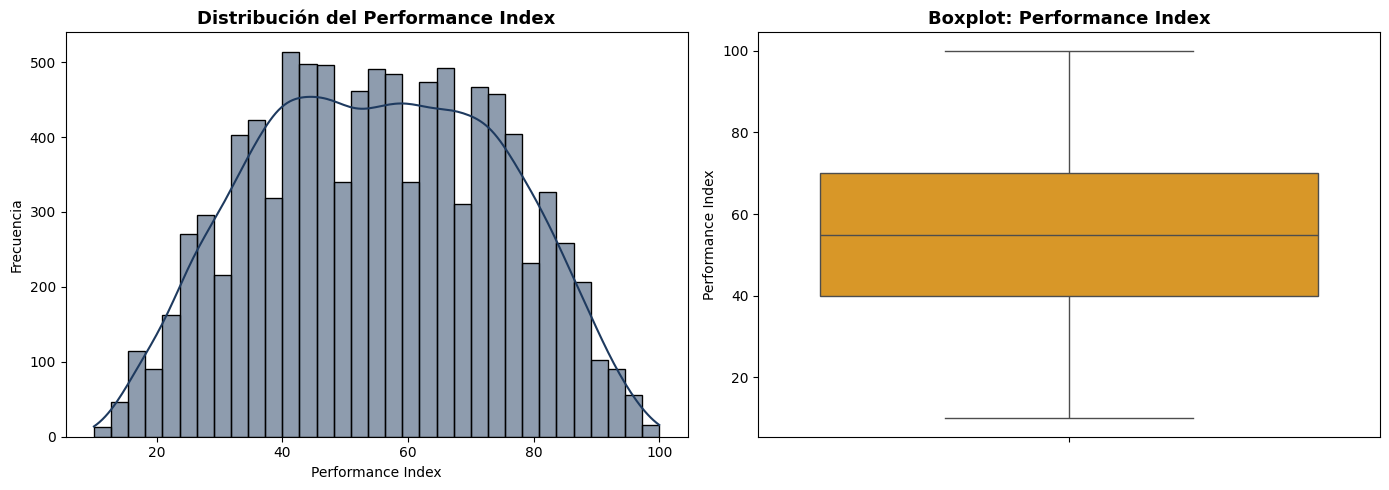

Media: 55.22 | Mediana: 55.00 | Std: 19.21


In [35]:
# ─── Distribución de la variable objetivo ─────────────────
# La distribución del Performance Index es lo más importante de observar:
# si es normal (campana), los modelos lineales funcionarán bien sin transformaciones

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma con curva KDE (estimación de densidad)
sns.histplot(df['Performance Index'], kde=True, ax=axes[0], color='#1e3a5f')
axes[0].set_title('Distribución del Performance Index', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Performance Index')
axes[0].set_ylabel('Frecuencia')

# Boxplot para detectar outliers
sns.boxplot(y=df['Performance Index'], ax=axes[1], color='#F59E0B')
axes[1].set_title('Boxplot: Performance Index', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Performance Index')

plt.tight_layout()
plt.show()

print(f"Media: {df['Performance Index'].mean():.2f} | Mediana: {df['Performance Index'].median():.2f} | Std: {df['Performance Index'].std():.2f}")

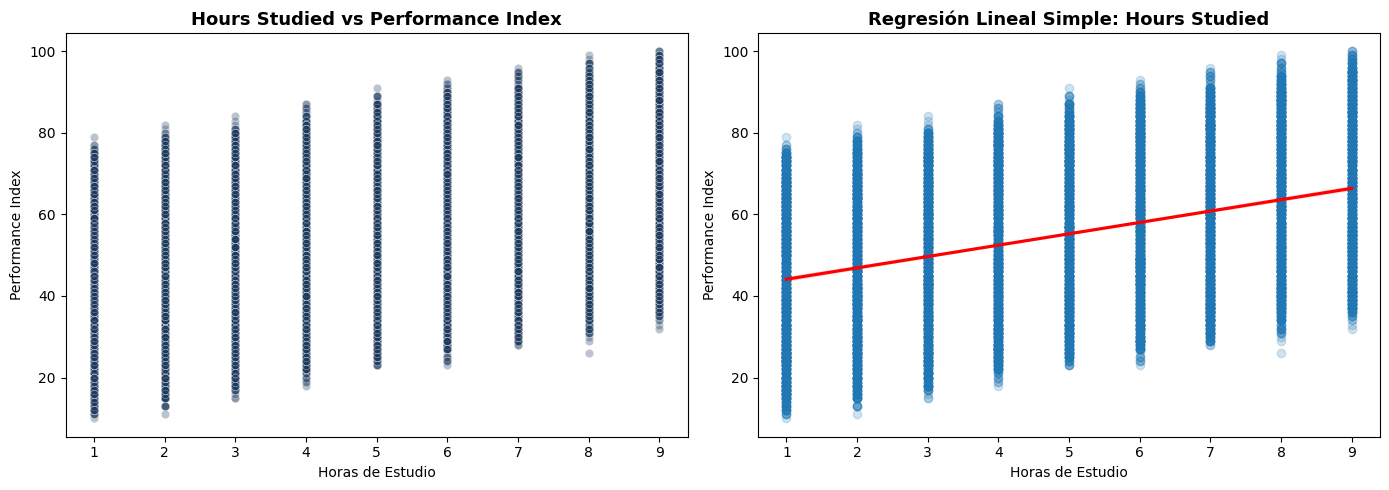

💡 Observación: Incluso con pocas horas de estudio, algunos estudiantes alcanzan altos índices.
   Esto sugiere que otras variables (Previous Scores) también tienen un peso importante.


In [36]:
# ─── Scatter: Hours Studied vs Performance ────────────────
# Este gráfico revela si existe una relación lineal entre horas de estudio y rendimiento.
# HALLAZGO CLAVE: con 5 horas de estudio hay alumnos desde ~25 hasta ~93.
# Conclusión: las horas de estudio NO son el único factor determinante.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=df['Hours Studied'], y=df['Performance Index'], alpha=0.3, ax=axes[0], color='#1e3a5f')
axes[0].set_title('Hours Studied vs Performance Index', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Horas de Estudio')
axes[0].set_ylabel('Performance Index')

sns.regplot(data=df, x='Hours Studied', y='Performance Index',
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title('Regresión Lineal Simple: Hours Studied', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Horas de Estudio')
axes[1].set_ylabel('Performance Index')

plt.tight_layout()
plt.show()

print("💡 Observación: Incluso con pocas horas de estudio, algunos estudiantes alcanzan altos índices.")
print("   Esto sugiere que otras variables (Previous Scores) también tienen un peso importante.")

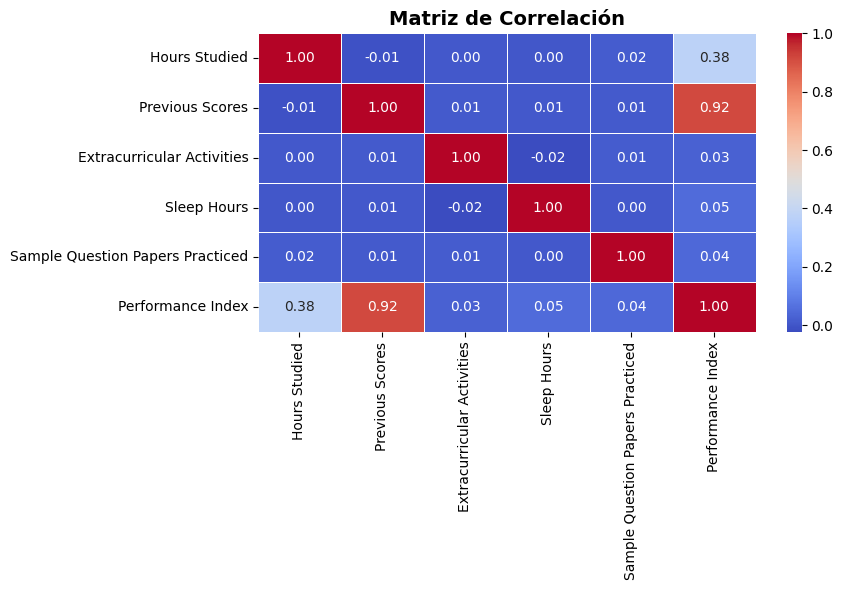


📊 Correlaciones con Performance Index:
Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Extracurricular Activities          0.026075

💡 HALLAZGO: Previous Scores (0.92) es el predictor más poderoso.
   Hours Studied (0.37) tiene correlación moderada-baja pero es el factor más ACCIONABLE.


In [37]:
# ─── Heatmap de correlaciones ────────────────────────────
# La matriz de correlación cuantifica la relación lineal entre todas las variables.
# Valores cercanos a 1 o -1 indican correlación fuerte; cercanos a 0, correlación débil.

plt.figure(figsize=(9, 6))
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
#mask[np.triu_indices_from(mask)] = True  # Mostrar solo triángulo inferior
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, mask=mask)
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Correlaciones con Performance Index:")
print(corr_matrix['Performance Index'].sort_values(ascending=False).to_string())
print("\n💡 HALLAZGO: Previous Scores (0.92) es el predictor más poderoso.")
print("   Hours Studied (0.37) tiene correlación moderada-baja pero es el factor más ACCIONABLE.")

---
## 5. 🛠️ Preparación de datos

Separamos las variables independientes (`X`) de la variable objetivo (`y`), y dividimos el dataset en **entrenamiento** y **prueba**.

Usamos la división estándar **80% / 20%** que aplicaremos en los modelos de producción.  
El parámetro `random_state=42` garantiza reproducibilidad: siempre obtendremos la misma partición.

In [38]:
# ─── Variable objetivo ────────────────────────────────────
y = df['Performance Index']

# ─── División 80/20 para modelos de producción ───────────
# X con las 5 variables (modelo múltiple)
X_multi = df.drop('Performance Index', axis=1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# X con 2 variables (modelo básico)
X_basic = df[['Hours Studied', 'Previous Scores']]
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_basic, y, test_size=0.2, random_state=42)

print("✅ Datos preparados y divididos")
print(f"   Train: {X_train_m.shape[0]} registros ({80}%)")
print(f"   Test : {X_test_m.shape[0]} registros ({20}%)")

✅ Datos preparados y divididos
   Train: 7898 registros (80%)
   Test : 1975 registros (20%)


---
## 6. 📈 Regresión Lineal Simple (Hours Studied)

Antes de los modelos finales, entrenamos un modelo de regresión lineal **con una sola variable** (`Hours Studied`).

**¿Para qué sirve esto?**  
Nos permite interpretar directamente la **pendiente** del modelo: cuánto varía el Performance Index por cada hora adicional de estudio, sin la interferencia de otras variables.

> ⚠️ Este modelo **no se usará en producción** por su bajo R², pero es valioso como punto de referencia e interpretación.

In [39]:
# ─── Modelo de regresión simple (solo Hours Studied) ──────
X_simple = df[['Hours Studied']]
y_simple = df['Performance Index']

simple_model = LinearRegression()
simple_model.fit(X_simple, y_simple)

# ─── Interpretación ───────────────────────────────────────
pendiente = simple_model.coef_[0]
intercepto = simple_model.intercept_
r2_simple = simple_model.score(X_simple, y_simple)

print("📈 Regresión Lineal Simple: Hours Studied → Performance Index")
print(f"   Ecuación : Performance = {intercepto:.2f} + {pendiente:.4f} × Hours_Studied")
print(f"   Pendiente: {pendiente:.4f} → Cada hora extra de estudio suma ~{pendiente:.2f} puntos")
print(f"   R² Score : {r2_simple:.4f} → El modelo explica solo el {r2_simple*100:.1f}% de la varianza")
print(f"\n💡 R² bajo confirma que una sola variable es insuficiente para predecir el rendimiento.")

📈 Regresión Lineal Simple: Hours Studied → Performance Index
   Ecuación : Performance = 41.32 + 2.7846 × Hours_Studied
   Pendiente: 2.7846 → Cada hora extra de estudio suma ~2.78 puntos
   R² Score : 0.1409 → El modelo explica solo el 14.1% de la varianza

💡 R² bajo confirma que una sola variable es insuficiente para predecir el rendimiento.


---
## 7. 🔒 Modelos de Regularización: Ridge y Lasso

El EDA reveló que `Previous Scores` tiene una correlación de **0.92** con el objetivo, muy superior al resto de variables. Esto puede provocar que el modelo dependa excesivamente de una sola variable y sea frágil ante datos nuevos.

La **regularización** penaliza los coeficientes grandes para generar modelos más equilibrados:

| Técnica | Tipo | Efecto |
|---|---|---|
| **Ridge (L2)** | Penaliza el cuadrado de los coeficientes | Reduce todos los coeficientes, no los anula |
| **Lasso (L1)** | Penaliza el valor absoluto de los coeficientes | Puede anular coeficientes → **selección automática de variables** |

> 🔬 En esta sección **excluimos `Previous Scores`** para analizar qué peso tienen las otras variables en ausencia del predictor dominante.

In [40]:
# ─── Dataset sin Previous Scores ─────────────────────────
# Excluimos la variable dominante para forzar al modelo a aprender de las demás
X_reg = df.drop(['Performance Index', 'Previous Scores'], axis=1)
y_reg = df['Performance Index']

# División 70 / 15 / 15 (Train / Val / Test)
X_tr, X_temp, y_tr, y_temp = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_val, X_te, y_val, y_te = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Split 70/15/15 → Train: {len(X_tr)} | Val: {len(X_val)} | Test: {len(X_te)}")

Split 70/15/15 → Train: 6911 | Val: 1481 | Test: 1481


In [41]:
# ─── Modelo Ridge ─────────────────────────────────────────
# alpha=1.0 es la penalización por defecto. A mayor alpha, más se penalizan los coeficientes grandes.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_tr, y_tr)

val_pred_ridge = ridge_model.predict(X_val)
r2_ridge_val = r2_score(y_val, val_pred_ridge)

# Análisis de sobreajuste
train_pred_ridge = ridge_model.predict(X_tr)
r2_ridge_train = r2_score(y_tr, train_pred_ridge)
diff_ridge = (r2_ridge_train - r2_ridge_val) / r2_ridge_train * 100

print("🔒 RIDGE (L2 Regularization)")
print(f"   R² Train      : {r2_ridge_train:.4f}")
print(f"   R² Validación : {r2_ridge_val:.4f}")
print(f"   Diferencia    : {diff_ridge:.2f}% → {'✅ Sin sobreajuste significativo' if diff_ridge < 5 else '⚠️ Posible sobreajuste'}")

🔒 RIDGE (L2 Regularization)
   R² Train      : 0.1474
   R² Validación : 0.1351
   Diferencia    : 8.34% → ⚠️ Posible sobreajuste


In [42]:
# ─── Modelo Lasso ─────────────────────────────────────────
# Lasso (L1) puede llevar coeficientes a exactamente 0 → selección de variables automática
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_tr, y_tr)

lasso_val_pred = lasso_model.predict(X_val)
r2_lasso_val = r2_score(y_val, lasso_val_pred)

print("🔒 LASSO (L1 Regularization)")
print(f"   R² Validación : {r2_lasso_val:.4f}")
print()

# ─── Coeficientes de Lasso ────────────────────────────────
# Si un coeficiente = 0, Lasso consideró que esa variable NO aporta información
coeff_df = pd.DataFrame({
    'Variable': X_reg.columns,
    'Coeficiente Lasso': lasso_model.coef_
})
print("📊 Coeficientes del modelo Lasso:")
print(coeff_df.to_string(index=False))
print()

eliminadas = coeff_df[coeff_df['Coeficiente Lasso'] == 0]['Variable'].tolist()
if eliminadas:
    print(f"💡 Lasso eliminó: {eliminadas} → coeficiente reducido a 0")
    print("   Esto sugiere que esa variable no aporta información relevante sin 'Previous Scores'.")

🔒 LASSO (L1 Regularization)
   R² Validación : 0.1338

📊 Coeficientes del modelo Lasso:
                        Variable  Coeficiente Lasso
                   Hours Studied           2.671779
      Extracurricular Activities           0.000000
                     Sleep Hours           0.156614
Sample Question Papers Practiced           0.072483

💡 Lasso eliminó: ['Extracurricular Activities'] → coeficiente reducido a 0
   Esto sugiere que esa variable no aporta información relevante sin 'Previous Scores'.


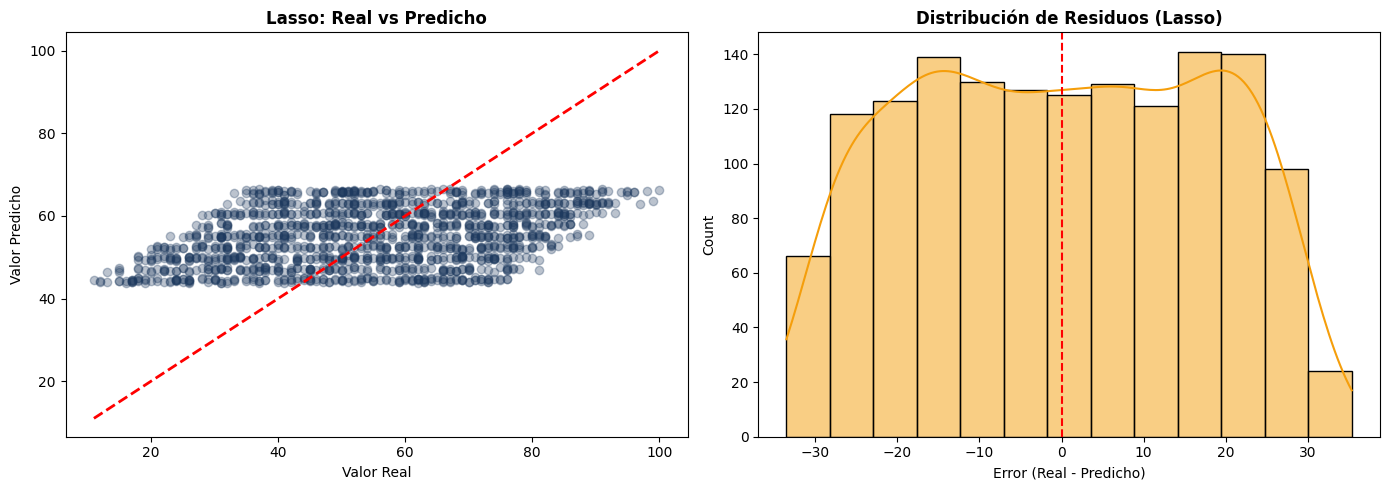

💡 Interpretación: Un R² bajo (~0.14) sin 'Previous Scores' confirma que
   esa variable es el motor principal de la predicción en este dataset.


In [43]:
# ─── Visualización: Real vs Predicho (Lasso) ─────────────
# Si los puntos se alinean sobre la diagonal roja → predicciones perfectas
# Dispersión amplia = el modelo tiene dificultades con este subconjunto de variables

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter Real vs Predicho
axes[0].scatter(y_val, lasso_val_pred, alpha=0.3, color='#1e3a5f')
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Valor Predicho')
axes[0].set_title('Lasso: Real vs Predicho', fontweight='bold')

# Distribución de residuos
residuals = y_val - lasso_val_pred
sns.histplot(residuals, kde=True, ax=axes[1], color='#F59E0B')
axes[1].set_title('Distribución de Residuos (Lasso)', fontweight='bold')
axes[1].set_xlabel('Error (Real - Predicho)')
axes[1].axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

print("💡 Interpretación: Un R² bajo (~0.14) sin 'Previous Scores' confirma que")
print("   esa variable es el motor principal de la predicción en este dataset.")

---
## 8. 🤖 Modelo Básico: 2 Variables → `modelo_notas.pkl`

El **Modelo Básico** usa únicamente `Hours Studied` y `Previous Scores`.  
Su fortaleza está en la **simplicidad**: requiere muy pocos datos del usuario y puede usarse cuando no se dispone de información completa.

**Ecuación del modelo:**
```
Performance = -29.78 + 2.855 × Hours_Studied + 1.018 × Previous_Scores
```

**Interpretación de coeficientes:**
- `+2.855` → cada hora adicional de estudio suma ~2.85 puntos en el Performance Index
- `+1.018` → cada punto más en notas anteriores suma ~1.02 puntos
- `-29.78` → intercepto (valor base teórico si ambas variables fueran 0)

In [44]:
# ─── Entrenamiento del Modelo Básico ─────────────────────
# X: solo 2 variables | y: Performance Index
# División 80/20 con random_state=42 para reproducibilidad
modelo_basico = LinearRegression()
modelo_basico.fit(X_train_b, y_train_b)

# ─── Coeficientes ────────────────────────────────────────
tabla_pesos = pd.DataFrame(
    modelo_basico.coef_,
    index=X_basic.columns,
    columns=['Coeficiente (Importancia)']
)

print("📊 Tabla de Importancia de Variables:")
print(tabla_pesos)
print(f"\n   Intercepto (base): {modelo_basico.intercept_:.4f}")
print(f"\n   Ecuación: Performance = {modelo_basico.intercept_:.2f} + "
    f"{modelo_basico.coef_[0]:.3f}×Hours + {modelo_basico.coef_[1]:.3f}×PrevScores")

📊 Tabla de Importancia de Variables:
                 Coeficiente (Importancia)
Hours Studied                     2.855064
Previous Scores                   1.018757

   Intercepto (base): -29.7821

   Ecuación: Performance = -29.78 + 2.855×Hours + 1.019×PrevScores


In [45]:
# ─── Evaluación del Modelo Básico ─────────────────────────
# y_pred: predicciones sobre el 20% de datos que el modelo nunca vio en entrenamiento
# r2_score: compara las predicciones (y_pred) con los valores reales (y_test_b)
y_pred_b = modelo_basico.predict(X_test_b)

r2_b  = r2_score(y_test_b, y_pred_b)
mae_b = mean_absolute_error(y_test_b, y_pred_b)

print("🎓 RESULTADOS DEL MODELO BÁSICO")
print(f"   R² Score    : {r2_b:.4f}  → El modelo explica el {r2_b*100:.1f}% de la varianza")
print(f"   MAE         : {mae_b:.2f}  → Error promedio de ±{mae_b:.2f} puntos")
print(f"\n✅ Con un error de ~{mae_b:.1f} puntos en una escala de 0-100, el modelo es muy preciso.")

🎓 RESULTADOS DEL MODELO BÁSICO
   R² Score    : 0.9850  → El modelo explica el 98.5% de la varianza
   MAE         : 1.88  → Error promedio de ±1.88 puntos

✅ Con un error de ~1.9 puntos en una escala de 0-100, el modelo es muy preciso.


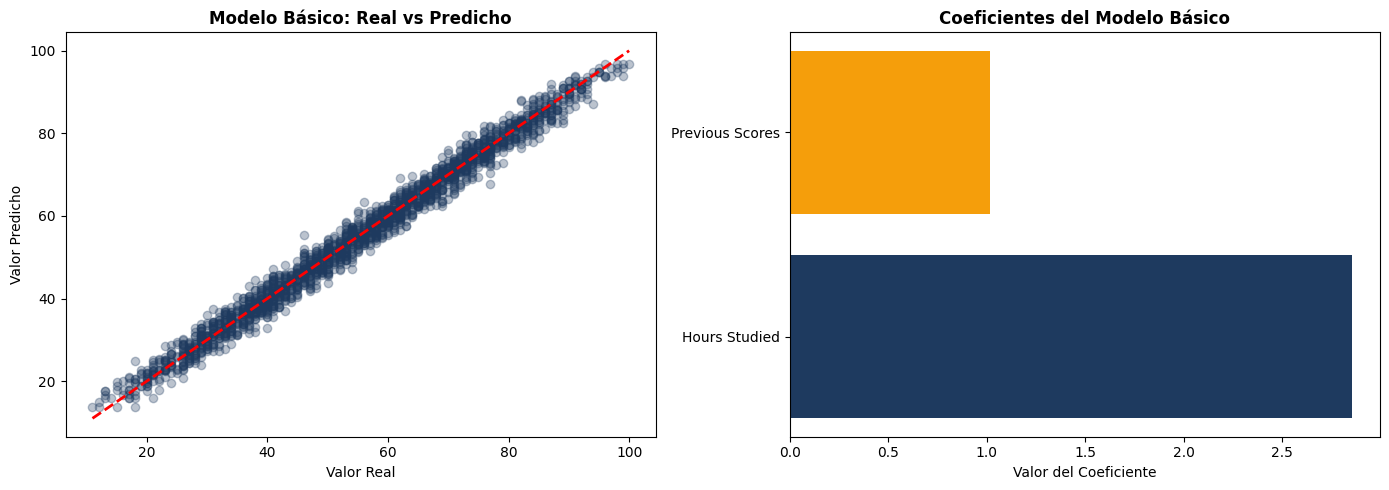

In [46]:
# ─── Visualización: Real vs Predicho ─────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_test_b, y_pred_b, alpha=0.3, color='#1e3a5f')
axes[0].plot([y_test_b.min(), y_test_b.max()], [y_test_b.min(), y_test_b.max()], 'r--', lw=2)
axes[0].set_title('Modelo Básico: Real vs Predicho', fontweight='bold')
axes[0].set_xlabel('Valor Real'); axes[0].set_ylabel('Valor Predicho')

# Importancia de variables
axes[1].barh(X_basic.columns, modelo_basico.coef_, color=['#1e3a5f', '#F59E0B'])
axes[1].set_title('Coeficientes del Modelo Básico', fontweight='bold')
axes[1].set_xlabel('Valor del Coeficiente')

plt.tight_layout()
plt.show()

In [47]:
# ─── Exportación: modelo_notas.pkl ───────────────────────
# joblib.dump serializa el objeto del modelo → lo guarda como archivo binario .pkl
# Más tarde, con joblib.load('modelo_notas.pkl') podemos recuperarlo sin reentrenar
joblib.dump(modelo_basico, 'modelo_notas.pkl')
print("✅ Modelo Básico guardado como 'modelo_notas.pkl'")
print("   Uso en Streamlit: modelo = joblib.load('modelo_notas.pkl')")

✅ Modelo Básico guardado como 'modelo_notas.pkl'
   Uso en Streamlit: modelo = joblib.load('modelo_notas.pkl')


---
## 9. 🚀 Modelo Múltiple: 5 Variables → `modelo_multiple.pkl`

El **Modelo Múltiple** utiliza todas las variables disponibles para hacer predicciones más completas.

| Variable | Tipo | Descripción |
|---|---|---|
| `Hours Studied` | Numérica | Horas de estudio diarias |
| `Previous Scores` | Numérica | Calificaciones anteriores |
| `Extracurricular Activities` | Categórica (0/1) | Participa en actividades extracurriculares |
| `Sleep Hours` | Numérica | Horas de sueño diarias |
| `Sample Question Papers Practiced` | Numérica | Exámenes de práctica realizados |

> Este modelo se usa en la app cuando el usuario puede proporcionar información más detallada.

In [48]:
# ─── Entrenamiento del Modelo Múltiple ───────────────────
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train_m, y_train_m)

# ─── Coeficientes ────────────────────────────────────────
tabla_multiple = pd.DataFrame({
    'Variable': X_multi.columns,
    'Coeficiente': modelo_multiple.coef_
}).sort_values('Coeficiente', ascending=False)

print("📊 Tabla de Importancia de Variables (Modelo Múltiple):")
print(tabla_multiple.to_string(index=False))
print(f"\n   Intercepto: {modelo_multiple.intercept_:.4f}")

📊 Tabla de Importancia de Variables (Modelo Múltiple):
                        Variable  Coeficiente
                   Hours Studied     2.851022
                 Previous Scores     1.018430
      Extracurricular Activities     0.573823
                     Sleep Hours     0.472073
Sample Question Papers Practiced     0.188704

   Intercepto: -33.9813


In [49]:
# ─── Evaluación del Modelo Múltiple ──────────────────────
y_pred_m_train = modelo_multiple.predict(X_train_m)
y_pred_m_test  = modelo_multiple.predict(X_test_m)

r2_train_m = r2_score(y_train_m, y_pred_m_train)
r2_test_m  = r2_score(y_test_m,  y_pred_m_test)
mae_m      = mean_absolute_error(y_test_m, y_pred_m_test)
rmse_m     = np.sqrt(mean_squared_error(y_test_m, y_pred_m_test))
overfitting= r2_train_m - r2_test_m

print("🚀 RESULTADOS DEL MODELO MÚLTIPLE")
print(f"   R² Train    : {r2_train_m:.4f}")
print(f"   R² Test     : {r2_test_m:.4f}")
print(f"   MAE         : {mae_m:.2f} puntos de error promedio")
print(f"   RMSE        : {rmse_m:.2f}")
print(f"   Overfitting : {overfitting:.6f} → {'✅ Prácticamente nulo' if abs(overfitting) < 0.01 else '⚠️ Revisar'}")

🚀 RESULTADOS DEL MODELO MÚLTIPLE
   R² Train    : 0.9887
   R² Test     : 0.9884
   MAE         : 1.65 puntos de error promedio
   RMSE        : 2.08
   Overfitting : 0.000309 → ✅ Prácticamente nulo


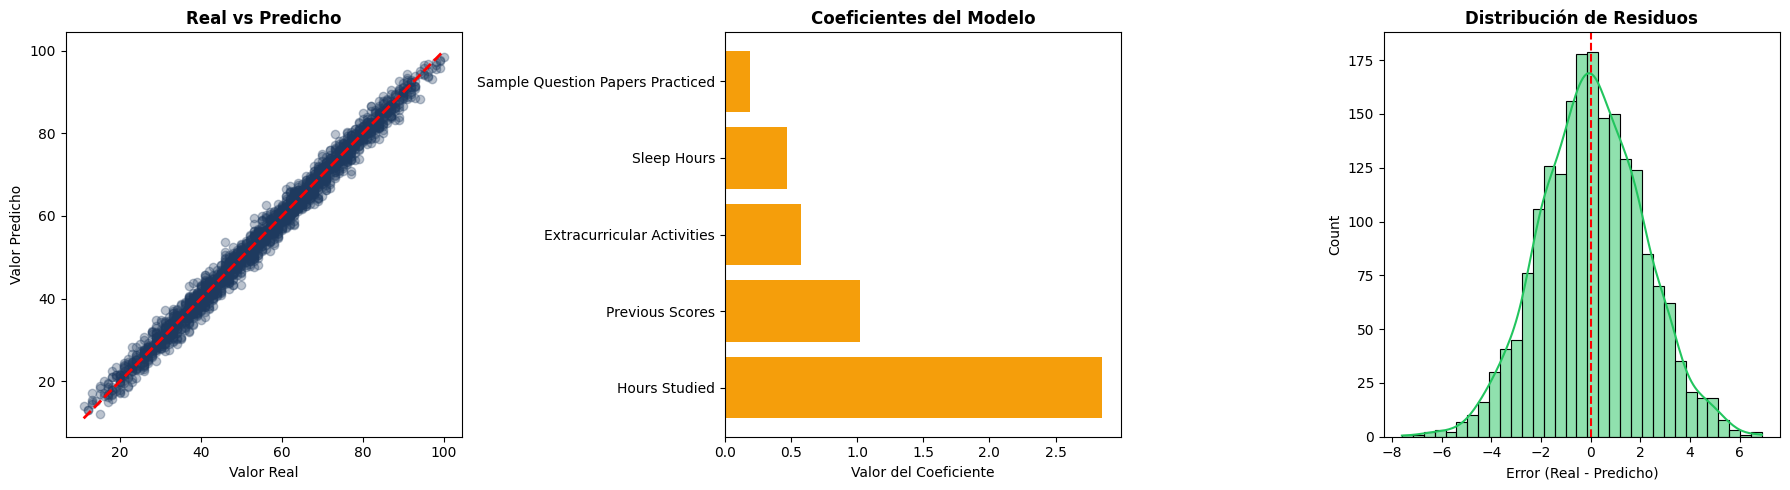

In [50]:
# ─── Visualización completa del Modelo Múltiple ──────────
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Real vs Predicho
axes[0].scatter(y_test_m, y_pred_m_test, alpha=0.3, color='#1e3a5f')
axes[0].plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2)
axes[0].set_title('Real vs Predicho', fontweight='bold')
axes[0].set_xlabel('Valor Real'); axes[0].set_ylabel('Valor Predicho')

# Importancia de variables
colors = ['#F59E0B' if c > 0 else '#EF4444' for c in modelo_multiple.coef_]
axes[1].barh(X_multi.columns, modelo_multiple.coef_, color=colors)
axes[1].set_title('Coeficientes del Modelo', fontweight='bold')
axes[1].set_xlabel('Valor del Coeficiente')
axes[1].axvline(x=0, color='black', linestyle='-', lw=0.5)

# Distribución de residuos
residuos_m = y_test_m - y_pred_m_test
sns.histplot(residuos_m, kde=True, ax=axes[2], color='#22C55E')
axes[2].set_title('Distribución de Residuos', fontweight='bold')
axes[2].set_xlabel('Error (Real - Predicho)')
axes[2].axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [51]:
# ─── Exportación: modelo_multiple.pkl ────────────────────
joblib.dump(modelo_multiple, 'modelo_multiple.pkl')
print("✅ Modelo Múltiple guardado como 'modelo_multiple.pkl'")
print("   Uso en Streamlit: modelo = joblib.load('modelo_multiple.pkl')")

✅ Modelo Múltiple guardado como 'modelo_multiple.pkl'
   Uso en Streamlit: modelo = joblib.load('modelo_multiple.pkl')


---
## 10. 🔄 Validación Cruzada K-Fold

La validación cruzada evalúa la **estabilidad del modelo** usando múltiples particiones del dataset, no solo una.

**¿Por qué es importante?**  
Una sola división 80/20 podría ser "afortunada" o "desafortunada". Con K-Fold aseguramos que el R² no depende de esa partición en particular.

**¿Cómo funciona K-Fold (K=5)?**
1. El dataset se divide en 5 subconjuntos (folds)
2. El modelo se entrena 5 veces, usando cada fold como test una vez
3. Se promedian los 5 R² → resultado más robusto y confiable

In [52]:
# ─── Validación Cruzada K-Fold (K=5) ────────────────────
# shuffle=True → mezcla los datos antes de dividir (evita sesgos por orden)
# random_state=42 → reproducibilidad
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Aplicamos K-Fold al Modelo Múltiple (el de producción)
r2_scores = cross_val_score(modelo_multiple, X_multi, y, cv=kf, scoring='r2')

print("🔄 Resultados de Validación Cruzada K-Fold (K=5):")
for i, score in enumerate(r2_scores, 1):
    print(f"   Fold {i}: R² = {score:.6f}")

print(f"\n   R² Promedio       : {r2_scores.mean():.6f}")
print(f"   Desviación Estándar: {r2_scores.std():.6f}")
print(f"\n✅ Desviación std muy baja ({r2_scores.std():.4f}) → Modelo muy estable, no depende de la partición")

🔄 Resultados de Validación Cruzada K-Fold (K=5):
   Fold 1: R² = 0.988430
   Fold 2: R² = 0.988323
   Fold 3: R² = 0.988905
   Fold 4: R² = 0.988722
   Fold 5: R² = 0.988913

   R² Promedio       : 0.988659
   Desviación Estándar: 0.000242

✅ Desviación std muy baja (0.0002) → Modelo muy estable, no depende de la partición


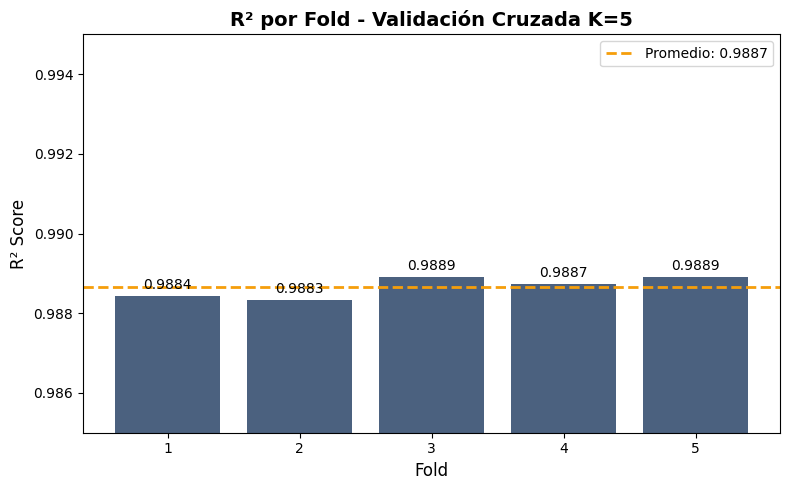

In [53]:
# ─── Visualización K-Fold ────────────────────────────────
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, 6), r2_scores, color='#1e3a5f', alpha=0.8)
plt.axhline(y=r2_scores.mean(), color='#F59E0B', linestyle='--', lw=2, label=f'Promedio: {r2_scores.mean():.4f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('R² por Fold - Validación Cruzada K=5', fontsize=14, fontweight='bold')
plt.ylim(0.985, 0.995)
plt.legend()

# Etiquetas en las barras
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
             f'{score:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

---
## 11. ⚖️ Comparación Final de Modelos

Comparamos todos los modelos entrenados para justificar la elección de los dos modelos de producción.

                    Modelo  R² Test  Variables                         Uso
  Regresión Simple (1 var)   0.1409          1         Referencia/análisis
 Ridge sin Previous Scores   0.1351          4 Comprobación regularización
 Lasso sin Previous Scores   0.1338          4      Selección de variables
  ★ Modelo Básico (2 vars)   0.9850          2       ✅ PRODUCCIÓN (rápido)
★ Modelo Múltiple (5 vars)   0.9884          5     ✅ PRODUCCIÓN (completo)


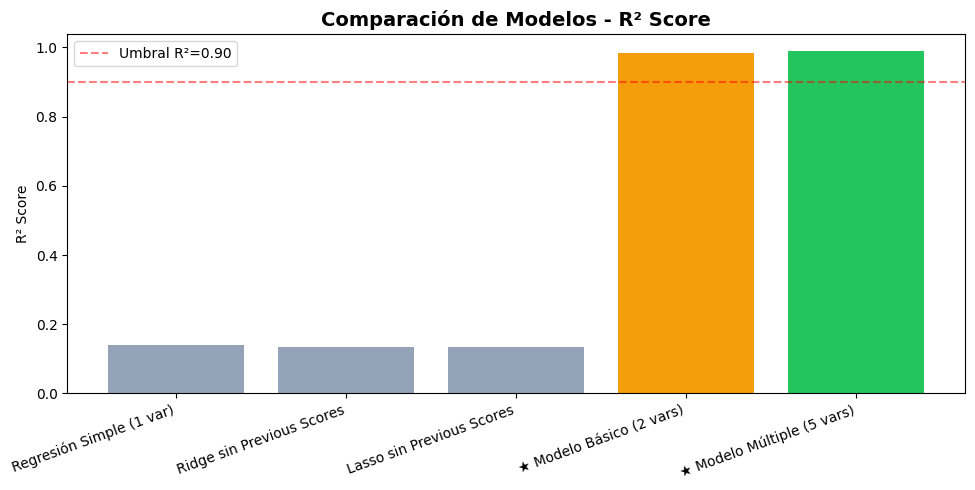

In [54]:
# ─── Tabla comparativa de todos los modelos ───────────────
comparacion = pd.DataFrame({
    'Modelo': [
        'Regresión Simple (1 var)',
        'Ridge sin Previous Scores',
        'Lasso sin Previous Scores',
        '★ Modelo Básico (2 vars)',
        '★ Modelo Múltiple (5 vars)'
    ],
    'R² Test': [
        round(r2_simple, 4),
        round(r2_ridge_val, 4),
        round(r2_lasso_val, 4),
        round(r2_b, 4),
        round(r2_test_m, 4)
    ],
    'Variables': [1, 4, 4, 2, 5],
    'Uso': [
        'Referencia/análisis',
        'Comprobación regularización',
        'Selección de variables',
        '✅ PRODUCCIÓN (rápido)',
        '✅ PRODUCCIÓN (completo)'
    ]
})

print(comparacion.to_string(index=False))

# ─── Gráfico comparativo ─────────────────────────────────
plt.figure(figsize=(10, 5))
colors = ['#94a3b8', '#94a3b8', '#94a3b8', '#F59E0B', '#22C55E']
bars = plt.bar(comparacion['Modelo'], comparacion['R² Test'], color=colors)
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='Umbral R²=0.90')
plt.ylabel('R² Score')
plt.title('Comparación de Modelos - R² Score', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

---
## 12. 🏁 Conclusiones

### ✅ Resultados del Proyecto

**Sobre los modelos de producción:**

- El **Modelo Básico** (`modelo_notas.pkl`) con solo 2 variables logra un R² ≈ **0.985** y un MAE de ~1.88 puntos. Es ideal para uso rápido cuando el usuario tiene información limitada.
- El **Modelo Múltiple** (`modelo_multiple.pkl`) con 5 variables logra R² ≈ **0.989** y MAE ~1.61. Ofrece mayor precisión a cambio de más datos de entrada.
- Ambos modelos presentan un **overfitting prácticamente nulo**, lo que garantiza que funcionarán bien con datos nuevos.

**Sobre el análisis Ridge/Lasso:**

- La regularización confirmó que `Previous Scores` es el predictor dominante (el modelo sin ella cae a R² ≈ 0.14).
- **Lasso** redujo el coeficiente de `Extracurricular Activities` a 0, lo que indica que esta variable no aporta cuando se excluyen las notas anteriores.
- **Conclusión metodológica:** las técnicas de regularización se usaron aquí como herramienta de análisis y comprobación, no como modelos de producción.

**Hallazgos clave del EDA:**

- `Previous Scores`: correlación **0.92** con Performance Index → predictor más sólido.
- `Hours Studied`: **+2.85 puntos por hora adicional** → factor más accionable e interpretable.
- `Sleep Hours`, `Extracurricular`, `Sample Papers`: correlación baja con el objetivo, pero su inclusión mejora ligeramente el modelo.

